![Py4Eng](img/logo.png)

# Numerical & symbolic calculus
## Yoav Ram

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(
    style='white',
    context='notebook',
    font_scale=1.5
)

from scipy import integrate

We will demonstrate how to preform integration in Python using *SciPy* for numerical integration and *SymPy* for symbolic integration.

# Numerical integration with SciPy

There are several numerical integration methods in `scipy.integrate`:

In [2]:
integrate?

Let's experiment with the `scipy.integrate.quad` method.

In [4]:
integrate.quad_explain()


    Compute a definite integral.

    Integrate func from `a` to `b` (possibly infinite interval) using a
    technique from the Fortran library QUADPACK.

    Parameters
    ----------
    func : function
        A Python function or method to integrate.  If `func` takes many
        arguments, it is integrated along the axis corresponding to the
        first argument.
        If the user desires improved integration performance, then f may
        instead be a ``ctypes`` function of the form:

            f(int n, double args[n]),

        where ``args`` is an array of function arguments and ``n`` is the
        length of ``args``. ``f.argtypes`` should be set to
        ``(c_int, c_double)``, and ``f.restype`` should be ``(c_double,)``.
    a : float
        Lower limit of integration (use -numpy.inf for -infinity).
    b : float
        Upper limit of integration (use numpy.inf for +infinity).
    args : tuple, optional
        Extra arguments to pass to `func`.
    full_output :

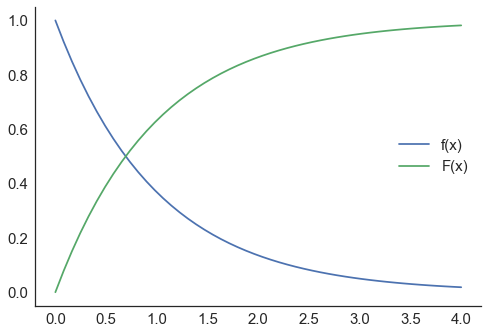

In [7]:
x = np.linspace(0, 4)
def f(x): 
    return np.exp(-x)
@np.vectorize
def F(x):
    return integrate.quad(f, a=0, b=x)[0]

plt.plot(x, f(x), label='f(x)')
plt.plot(x, F(x), label='F(x)')
plt.legend()
sns.despine()

## Exercise
### Numerical integration

Integrate the function $\frac{\log(t)}{1+t}$ from $1$ to $x$ using one of the integration functions in `scipy.integrate` and plot the results for $x \in (1,2)$.

## Exercise
### Numerical differentiation

Use `scipy.misc.derivative` to differentiate the function $\frac{\log{t}}{1+t}$ and plot the result for $t \in (1, 2)$.

In [8]:
from scipy.misc import derivative

# Sybmolic integration with *SymPy*

[![SymPy logo](http://docs.sympy.org/latest/_static/sympylogo.png)](http://sympy.org/)

*SymPy* is a Python package for symbolic mathematics. It has many capabilities, but right now we will focus on symbolic integration. Install with `conda install sympy` or `pip install sympy`.

In [9]:
import sympy
print("SymPy version:", sympy.__version__)
sympy.init_printing() # for notebook display

SymPy version: 1.0


First we must define our symbols. As we are working with a single variable functions, we only need `x`:

In [10]:
t = sympy.symbols('t')
f = sympy.exp(-t)
f

In [13]:
sympy.integrate?

In [11]:
F = sympy.integrate(f, t)
F

To evaluate a function we use the `evalf` methods and define the substitution from a symbol to a number.

We can also produce a definite integral.

In [12]:
fx = [f.evalf(subs={t:xi}) for xi in x]
Fx = [sympy.integrate(f, (t, 0, xi)) for xi in x]

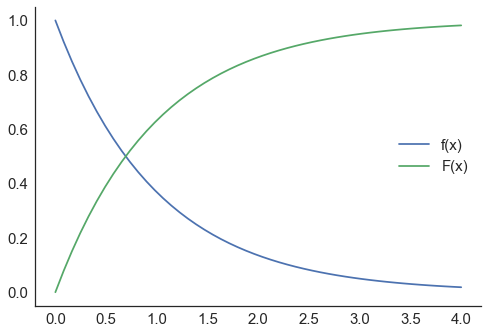

In [13]:
plt.plot(x, fx, label='f(x)')
plt.plot(x, Fx, label='F(x)')
plt.legend(loc='center right')
sns.despine()

## Exercise
### Symbolic differentiation

Calculate the derivative of  $\frac{\log{t}}{1+t}$ with respect to $t$ using `sympy.diff`.
Print it and and plot it for $t \in (1, 2)$. Compare the result with the numerical differentiation result from above.

## SymPy - more

SymPy can do much more.

For example, solve equation systems:

In [20]:
x, y = sympy.symbols('x y')

eqs = (
    x + 5*y - 2, 
    -3*x + 6*y - 15
)

sol = sympy.solve(eqs, (x, y))
sol

In [21]:
eqs[0].subs(sol), eqs[1].subs(sol)

Find a limit:

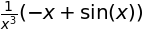

In [23]:
expr = (sympy.sin(x) - x) / x**3
expr

In [24]:
sympy.limit(expr, x, 0)

## Colophon
This notebook was written by [Yoav Ram](http://python.yoavram.com) and is part of the [_Python for Engineers_](https://github.com/yoavram/Py4Eng) course.

The notebook was written using [Python](http://python.org/) 3.6.0, [IPython](http://ipython.org/) 5.2.2, [Jupyter](http://jupyter.org) 4.3.0.

This work is licensed under a CC BY-NC-SA 4.0 International License.

![Python logo](https://www.python.org/static/community_logos/python-logo.png)